In [1]:
# Creating a directory and copying the 'kaggle.json' file to the appropriate location.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [3]:
# Downloading the 'dogs-vs-cats' dataset using the Kaggle CLI.
!kaggle datasets download -d lucassj/dogs-vs-cats-train-validadion-and-evaluation

 99% 1.06G/1.07G [00:11<00:00, 65.0MB/s]
100% 1.07G/1.07G [00:11<00:00, 100MB/s] 


In [4]:

# Extracting contents from a zip file using the zipfile module.
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats-train-validadion-and-evaluation.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:

# Importing TensorFlow and Keras, defining a Sequential model with various layers.
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [8]:

# Generators
# Creating an image dataset from a directory with specified parameters using TensorFlow and Keras.

train_ds = keras.utils.image_dataset_from_directory(directory='/content/train', labels='inferred',
                                                    label_mode='int', batch_size=32,
                                                    image_size=(256, 256))

validation_ds = keras.utils.image_dataset_from_directory(directory='/content/validation', labels='inferred',
                                                    label_mode='int', batch_size=32,
                                                    image_size=(256, 256))


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
# Normalization

def process(image,label):
  image = tf.cast(image/255.0,tf.float32)
  return image,label

train_ds =train_ds.map(process)
validation_ds = validation_ds.map(process)

In [10]:
train_ds

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
#  create CNN model

In [13]:
# Architecture
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(256,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

# View summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [15]:
history = model.fit(train_ds,validation_data=validation_ds,batch_size=32,epochs=10)

Epoch 1/10
625/625 [==============================] - 97s 130ms/step - loss: 1.1379 - accuracy: 0.5778 - val_loss: 0.6749 - val_accuracy: 0.5790
Epoch 2/10
625/625 [==============================] - 70s 111ms/step - loss: 0.6047 - accuracy: 0.6704 - val_loss: 0.5841 - val_accuracy: 0.6922
Epoch 3/10
625/625 [==============================] - 70s 112ms/step - loss: 0.5181 - accuracy: 0.7441 - val_loss: 0.5020 - val_accuracy: 0.7546
Epoch 4/10
625/625 [==============================] - 70s 112ms/step - loss: 0.4308 - accuracy: 0.7993 - val_loss: 0.6354 - val_accuracy: 0.6524
Epoch 5/10
625/625 [==============================] - 69s 109ms/step - loss: 0.3507 - accuracy: 0.8433 - val_loss: 1.5408 - val_accuracy: 0.5896
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2817 - accuracy: 0.8808 - val_loss: 0.5441 - val_accuracy: 0.7608
Epoch 7/10
625/625 [==============================] - 70s 112ms/step - loss: 0.2114 - accuracy: 0.9114 - val_loss: 0.4285 - val_ac

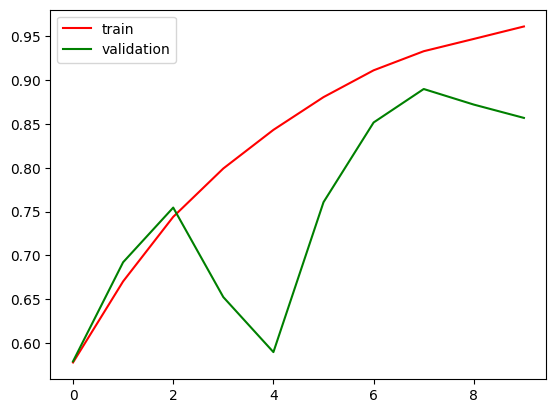

In [16]:

# Plotting the training and validation accuracy over epochs using Matplotlib.

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='green', label='validation')
plt.legend()
plt.show()

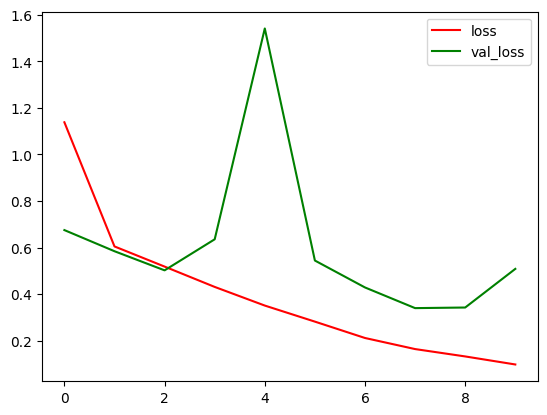

In [17]:

plt.plot(history.history['loss'], color='red', label='loss')
plt.plot(history.history['val_loss'], color='green', label='val_loss')
plt.legend()
plt.show()

In [18]:
# Overall, the model performed well, achieving high accuracy on both the training and validation datasets. The decrease in loss and improvement in accuracy over the epochs suggest that the model learned to generalize and make accurate predictions on new data. This outcome indicates that the model is suitable for the given task and has successfully learned the patterns and features necessary for classifying the images in the dataset.

In [19]:
import cv2

In [35]:
test_img = cv2.imread('/content/dog.jpg')

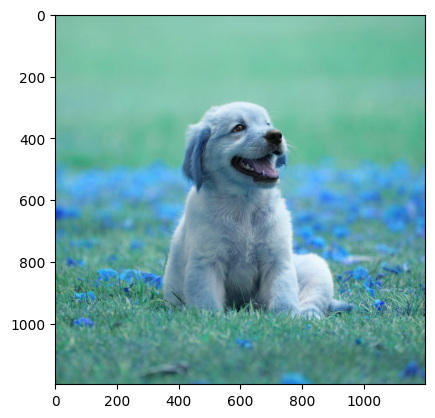

In [36]:

plt.imshow(test_img)

In [37]:
test_img.shape

(1197, 1200, 3)

In [38]:

test_img = cv2.resize(test_img, (256,256))

In [39]:
test_input = test_img.reshape((1, 256,256,3))

In [40]:
model.predict(test_input)

1/1 [==============================] - 0s 22ms/step


array([[1.]], dtype=float32)